In [50]:
from sklearn.datasets import fetch_openml
X, y_str = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

In [51]:
from sklearn.preprocessing import LabelEncoder
import numpy
le = LabelEncoder().fit(y_str)
y = le.transform(y_str)

shape =  numpy.shape(X)


X = numpy.array(X)
y = numpy.array(y)

X = X.astype(float)
y = y.astype(float)

X_train = []
y_train = []
X_test = []
y_test = []

print("Αντικείμενα:",shape[0])
(unique) = numpy.unique(y)
print("Κλάσεις του y:",len(unique))
print("X mean:",numpy.mean(X,0))
print("X variance:",numpy.var(X,0))
print("X max value:",numpy.max(X,0))
print("X min value:",numpy.min(X,0))


#Χωρίζω το train και test set 
for i in range(len(X)):
    if(i<60000):
        X_train.append(X[i])
        y_train.append(y[i])
    else:
        X_test.append(X[i])
        y_test.append(y[i])

X_train = numpy.array(X_train)
y_train = numpy.array(y_train)
X_test = numpy.array(X_test)
y_test = numpy.array(y_test)





Αντικείμενα: 70000
Κλάσεις του y: 10
X mean: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.80000000e-03 6.71428571e-03 3.08571429e-03 1.28571429e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.28571429e-04 1.32857143e-03 1.13285714e-02 2.30714286e-02
 4.32285714e-02 6.22428571e-02 1.17928571e-01 1.71242857e-01
 1.93414286e-01 1.90085714e-01 2.06285714e-01 1.82742857e-01
 1.70100000e-01 1.44514286e-01 9.92428571e-02 6.82285714e-02
 4.88714286e-02 1.83142857e-02 8.64285714e-03 3.02857143e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 9.14285714e-04 6.00000000e-04
 5.95714286e-03 1.09428571e-02 5.6300000

X variance: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.93653903e-01 1.58812635e+00 6.66504764e-01 1.15712633e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.65709061e-03 5.30982349e-02 1.74962881e+00 4.11896771e+00
 8.70847415e+00 1.05105401e+01 2.32360500e+01 3.22300330e+01
 3.66257766e+01 3.47764388e+01 3.89812748e+01 3.50474050e+01
 3.15813660e+01 2.77318299e+01 1.87346223e+01 1.35520591e+01
 9.19796873e+00 3.23620744e+00 1.25751102e+00 5.57619399e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.85134498e-02 1.44282114e-02
 5.70035941e-01 1.03985168e+00 9.40001602e+00 2.47620145e+01
 5.07680249e

In [52]:
#Απαιτείται scaling για τον PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

***Θα εφαρμόσω αλγόριθμο random forests***

In [53]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from IPython.display import display, Markdown

params = {
        'n_estimators': numpy.logspace(1, 0, 2,dtype = 'int')
#δοκιμάζω μικρές τιμές για το n ώστε να μην ξεφεύγει πολύ ο χρόνος εκτέλεσης του 3.2 ερωτήματος με κάποιο κόστος στο accuracy
        
}

start_time = time.time()
clf = RandomForestClassifier()
grid = GridSearchCV(clf,cv=5,param_grid=params,verbose=4)
grid.fit(X_train_scaled, y_train)#scaled data δεν επιφέρουν αλλαγή στον random forests άλλα τα κάνω για τον pca στην συνεχεια
pred = grid.predict(X_test_scaled)   

end_time = time.time()
#Τα κρατάω σε διαφορετικές μεταβλητές για να τα συγκρίνω με τον ιδιο αλγόριθμο εφαρμόζωντας pca
error_rate_no_pca = 1-accuracy_score(y_test,pred)
no_pca_time = end_time-start_time

display(Markdown(
"### Random Forests "+ ":\n" +
    "**Error rate:** {:.2f}".format(error_rate_no_pca*100)+"%<br>"+
    "**Training time:** {:.2f}".format(no_pca_time)+" seconds"
))

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ...................n_estimators=10;, score=0.944 total time=   3.0s
[CV 2/5] END ...................n_estimators=10;, score=0.944 total time=   3.0s
[CV 3/5] END ...................n_estimators=10;, score=0.940 total time=   3.0s
[CV 4/5] END ...................n_estimators=10;, score=0.940 total time=   3.0s
[CV 5/5] END ...................n_estimators=10;, score=0.948 total time=   3.2s
[CV 1/5] END ....................n_estimators=1;, score=0.791 total time=   0.4s
[CV 2/5] END ....................n_estimators=1;, score=0.797 total time=   0.5s
[CV 3/5] END ....................n_estimators=1;, score=0.792 total time=   0.5s
[CV 4/5] END ....................n_estimators=1;, score=0.804 total time=   0.5s
[CV 5/5] END ....................n_estimators=1;, score=0.822 total time=   0.5s


### Random Forests :
**Error rate:** 4.98%<br>**Training time:** 23.40 seconds

***PCA***

In [54]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

start_time = time.time()
pca = PCA().fit(X_train_scaled)
end_time = time.time()
print("PCA execution time:",end_time-start_time,"sec")
print("Explained variance ratio of first component",pca.explained_variance_ratio_[0])


PCA execution time: 4.436789035797119 sec
Explained variance ratio of first component 0.056467169197417594


Text(0, 0.5, 'Explained variance %')

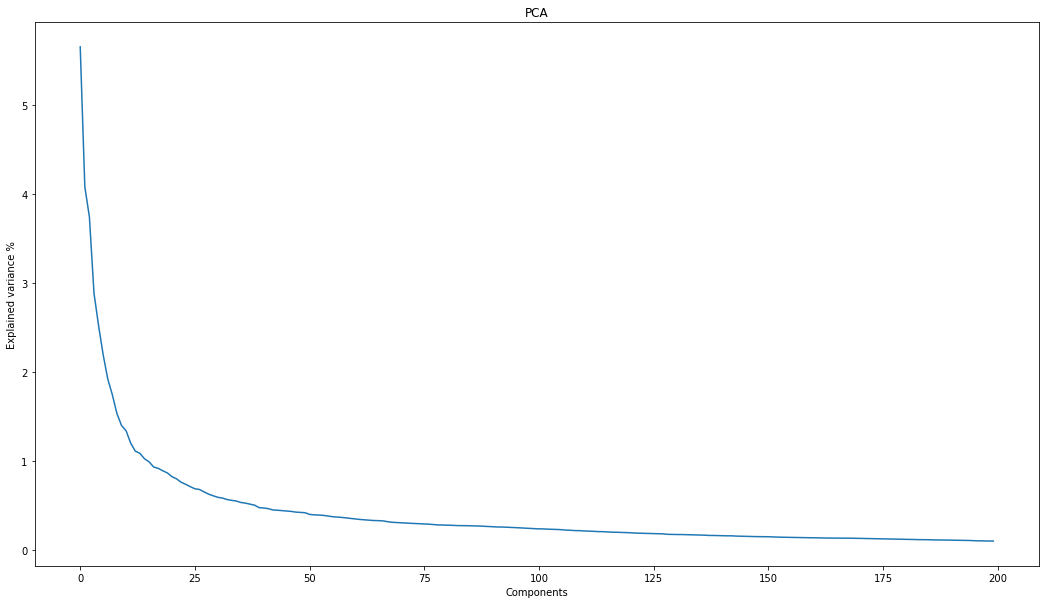

In [55]:
plt.figure(figsize=(18,10))
plt.plot(range(200),pca.explained_variance_ratio_[0:200]*100)#εμφανίζω explained variance σε μορφή ποσοστού
plt.title("PCA")
plt.xlabel("Components")
plt.ylabel("Explained variance %")


In [56]:
#Προβολή των δεδομένων σε όλες τις συνιστώσες του training set
X_train_trans = pca.transform(X_train_scaled)
X_test_trans = pca.transform(X_test_scaled)
print(numpy.shape(X_train_trans))

start_time = time.time()
clf = RandomForestClassifier()
grid = GridSearchCV(clf,cv=5,param_grid=params,verbose=4)
grid.fit(X_train_trans, y_train)
pred = grid.predict(X_test_trans)   

end_time = time.time()
error_rate = 1-accuracy_score(y_test,pred)


display(Markdown(
"### Random Forests in PCA with all components "+ ":\n" +
    "**Error rate:** {:.2f}".format(error_rate*100)+"%<br>"+
    "**Training time:** {:.2f}".format(end_time-start_time)+" seconds"
))

(60000, 784)
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ...................n_estimators=10;, score=0.835 total time=  13.8s
[CV 2/5] END ...................n_estimators=10;, score=0.826 total time=  14.1s
[CV 3/5] END ...................n_estimators=10;, score=0.834 total time=  13.8s
[CV 4/5] END ...................n_estimators=10;, score=0.820 total time=  14.2s
[CV 5/5] END ...................n_estimators=10;, score=0.851 total time=  14.2s
[CV 1/5] END ....................n_estimators=1;, score=0.563 total time=   1.6s
[CV 2/5] END ....................n_estimators=1;, score=0.539 total time=   1.6s
[CV 3/5] END ....................n_estimators=1;, score=0.565 total time=   1.5s
[CV 4/5] END ....................n_estimators=1;, score=0.573 total time=   1.7s
[CV 5/5] END ....................n_estimators=1;, score=0.521 total time=   1.6s


### Random Forests in PCA with all components :
**Error rate:** 14.82%<br>**Training time:** 98.03 seconds

***Πολύ κακό performance οπότε πρέπει να επιλέξουμε λιγότερες κύριες συνιστώσες***

In [57]:
error = []
expvar = []
exetime = []



for comp in range(5,100,5):
    start_time = time.time()
    pca = PCA(n_components=comp).fit(X_train_scaled)
    X_train_trans = pca.transform(X_train_scaled)
    pca_time=time.time()-start_time
    
    
    clf = RandomForestClassifier()
    grid = GridSearchCV(clf,cv=5,param_grid=params,verbose=4)#προαιρετικό το verbose=4 απλά να φαίνεται η εκτέλεση των folds
    grid.fit(X_train_trans, y_train)
    end_time = time.time()
    
    error_rate = 1-grid.best_score_
    explained_var = sum(pca.explained_variance_ratio_[0:comp])
    t = end_time-start_time
    display(Markdown(
    "### Pca for {}".format(comp) + " components" + ":\n" +
    "**Error rate:** {:.4f}".format(error_rate)+"<br>"+  #αφήνω παραπάνω δεκαδικά ψηφία στο error rate για να φαίνεται η διαφορά
    "**Training set explained variance** {:.2f}".format(explained_var)+"<br>"+
    "**PCA time** {:.2f}".format(pca_time)+" seconds<br>"+
    "**Total execution time** {:.2f}".format(t)+" seconds<br>"+
    "**Random forests training time:** {:.2f}".format(t-pca_time)+" seconds"
))
    #κρατάω τα δεδομένα για το plot
    error.append(error_rate)
    expvar.append(explained_var)
    exetime.append(t)
    

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ...................n_estimators=10;, score=0.739 total time=   1.0s
[CV 2/5] END ...................n_estimators=10;, score=0.730 total time=   1.0s
[CV 3/5] END ...................n_estimators=10;, score=0.732 total time=   1.0s
[CV 4/5] END ...................n_estimators=10;, score=0.730 total time=   1.0s
[CV 5/5] END ...................n_estimators=10;, score=0.742 total time=   1.0s
[CV 1/5] END ....................n_estimators=1;, score=0.641 total time=   0.0s
[CV 2/5] END ....................n_estimators=1;, score=0.645 total time=   0.0s
[CV 3/5] END ....................n_estimators=1;, score=0.646 total time=   0.0s
[CV 4/5] END ....................n_estimators=1;, score=0.638 total time=   0.0s
[CV 5/5] END ....................n_estimators=1;, score=0.655 total time=   0.0s


### Pca for 5 components:
**Error rate:** 0.2655<br>**Training set explained variance** 0.19<br>**PCA time** 2.20 seconds<br>**Total execution time** 9.47 seconds<br>**Random forests training time:** 7.26 seconds

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ...................n_estimators=10;, score=0.887 total time=   1.4s
[CV 2/5] END ...................n_estimators=10;, score=0.881 total time=   1.4s
[CV 3/5] END ...................n_estimators=10;, score=0.879 total time=   1.4s
[CV 4/5] END ...................n_estimators=10;, score=0.878 total time=   1.4s
[CV 5/5] END ...................n_estimators=10;, score=0.889 total time=   1.4s
[CV 1/5] END ....................n_estimators=1;, score=0.785 total time=   0.1s
[CV 2/5] END ....................n_estimators=1;, score=0.771 total time=   0.1s
[CV 3/5] END ....................n_estimators=1;, score=0.775 total time=   0.1s
[CV 4/5] END ....................n_estimators=1;, score=0.762 total time=   0.1s
[CV 5/5] END ....................n_estimators=1;, score=0.783 total time=   0.1s


### Pca for 10 components:
**Error rate:** 0.1172<br>**Training set explained variance** 0.28<br>**PCA time** 2.50 seconds<br>**Total execution time** 12.66 seconds<br>**Random forests training time:** 10.15 seconds

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ...................n_estimators=10;, score=0.907 total time=   1.4s
[CV 2/5] END ...................n_estimators=10;, score=0.905 total time=   1.4s
[CV 3/5] END ...................n_estimators=10;, score=0.902 total time=   1.4s
[CV 4/5] END ...................n_estimators=10;, score=0.896 total time=   1.4s
[CV 5/5] END ...................n_estimators=10;, score=0.911 total time=   1.4s
[CV 1/5] END ....................n_estimators=1;, score=0.781 total time=   0.1s
[CV 2/5] END ....................n_estimators=1;, score=0.779 total time=   0.1s
[CV 3/5] END ....................n_estimators=1;, score=0.777 total time=   0.1s
[CV 4/5] END ....................n_estimators=1;, score=0.781 total time=   0.1s
[CV 5/5] END ....................n_estimators=1;, score=0.795 total time=   0.1s


### Pca for 15 components:
**Error rate:** 0.0959<br>**Training set explained variance** 0.33<br>**PCA time** 2.28 seconds<br>**Total execution time** 12.48 seconds<br>**Random forests training time:** 10.20 seconds

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ...................n_estimators=10;, score=0.916 total time=   1.9s
[CV 2/5] END ...................n_estimators=10;, score=0.910 total time=   1.9s
[CV 3/5] END ...................n_estimators=10;, score=0.912 total time=   1.9s
[CV 4/5] END ...................n_estimators=10;, score=0.909 total time=   1.9s
[CV 5/5] END ...................n_estimators=10;, score=0.918 total time=   1.9s
[CV 1/5] END ....................n_estimators=1;, score=0.801 total time=   0.1s
[CV 2/5] END ....................n_estimators=1;, score=0.790 total time=   0.1s
[CV 3/5] END ....................n_estimators=1;, score=0.773 total time=   0.1s
[CV 4/5] END ....................n_estimators=1;, score=0.778 total time=   0.1s
[CV 5/5] END ....................n_estimators=1;, score=0.807 total time=   0.1s


### Pca for 20 components:
**Error rate:** 0.0871<br>**Training set explained variance** 0.38<br>**PCA time** 2.53 seconds<br>**Total execution time** 16.00 seconds<br>**Random forests training time:** 13.46 seconds

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ...................n_estimators=10;, score=0.917 total time=   2.4s
[CV 2/5] END ...................n_estimators=10;, score=0.910 total time=   2.3s
[CV 3/5] END ...................n_estimators=10;, score=0.910 total time=   2.3s
[CV 4/5] END ...................n_estimators=10;, score=0.910 total time=   2.4s
[CV 5/5] END ...................n_estimators=10;, score=0.921 total time=   2.3s
[CV 1/5] END ....................n_estimators=1;, score=0.790 total time=   0.2s
[CV 2/5] END ....................n_estimators=1;, score=0.772 total time=   0.2s
[CV 3/5] END ....................n_estimators=1;, score=0.775 total time=   0.2s
[CV 4/5] END ....................n_estimators=1;, score=0.783 total time=   0.2s
[CV 5/5] END ....................n_estimators=1;, score=0.796 total time=   0.2s


### Pca for 25 components:
**Error rate:** 0.0864<br>**Training set explained variance** 0.42<br>**PCA time** 2.96 seconds<br>**Total execution time** 19.78 seconds<br>**Random forests training time:** 16.81 seconds

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ...................n_estimators=10;, score=0.919 total time=   2.4s
[CV 2/5] END ...................n_estimators=10;, score=0.913 total time=   2.3s
[CV 3/5] END ...................n_estimators=10;, score=0.912 total time=   2.4s
[CV 4/5] END ...................n_estimators=10;, score=0.911 total time=   2.4s
[CV 5/5] END ...................n_estimators=10;, score=0.919 total time=   2.4s
[CV 1/5] END ....................n_estimators=1;, score=0.793 total time=   0.2s
[CV 2/5] END ....................n_estimators=1;, score=0.781 total time=   0.2s
[CV 3/5] END ....................n_estimators=1;, score=0.770 total time=   0.2s
[CV 4/5] END ....................n_estimators=1;, score=0.771 total time=   0.1s
[CV 5/5] END ....................n_estimators=1;, score=0.796 total time=   0.2s


### Pca for 30 components:
**Error rate:** 0.0851<br>**Training set explained variance** 0.45<br>**PCA time** 2.61 seconds<br>**Total execution time** 19.53 seconds<br>**Random forests training time:** 16.91 seconds

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ...................n_estimators=10;, score=0.921 total time=   2.4s
[CV 2/5] END ...................n_estimators=10;, score=0.910 total time=   2.3s
[CV 3/5] END ...................n_estimators=10;, score=0.911 total time=   2.5s
[CV 4/5] END ...................n_estimators=10;, score=0.909 total time=   2.3s
[CV 5/5] END ...................n_estimators=10;, score=0.920 total time=   2.4s
[CV 1/5] END ....................n_estimators=1;, score=0.792 total time=   0.1s
[CV 2/5] END ....................n_estimators=1;, score=0.779 total time=   0.2s
[CV 3/5] END ....................n_estimators=1;, score=0.768 total time=   0.2s
[CV 4/5] END ....................n_estimators=1;, score=0.746 total time=   0.1s
[CV 5/5] END ....................n_estimators=1;, score=0.787 total time=   0.2s


### Pca for 35 components:
**Error rate:** 0.0860<br>**Training set explained variance** 0.48<br>**PCA time** 3.09 seconds<br>**Total execution time** 20.05 seconds<br>**Random forests training time:** 16.95 seconds

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ...................n_estimators=10;, score=0.919 total time=   3.0s
[CV 2/5] END ...................n_estimators=10;, score=0.917 total time=   3.0s
[CV 3/5] END ...................n_estimators=10;, score=0.913 total time=   2.8s
[CV 4/5] END ...................n_estimators=10;, score=0.913 total time=   2.9s
[CV 5/5] END ...................n_estimators=10;, score=0.922 total time=   2.9s
[CV 1/5] END ....................n_estimators=1;, score=0.774 total time=   0.2s
[CV 2/5] END ....................n_estimators=1;, score=0.766 total time=   0.2s
[CV 3/5] END ....................n_estimators=1;, score=0.758 total time=   0.2s
[CV 4/5] END ....................n_estimators=1;, score=0.762 total time=   0.2s
[CV 5/5] END ....................n_estimators=1;, score=0.773 total time=   0.2s


### Pca for 40 components:
**Error rate:** 0.0831<br>**Training set explained variance** 0.51<br>**PCA time** 2.60 seconds<br>**Total execution time** 23.11 seconds<br>**Random forests training time:** 20.51 seconds

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ...................n_estimators=10;, score=0.920 total time=   2.9s
[CV 2/5] END ...................n_estimators=10;, score=0.911 total time=   2.8s
[CV 3/5] END ...................n_estimators=10;, score=0.913 total time=   2.9s
[CV 4/5] END ...................n_estimators=10;, score=0.912 total time=   2.9s
[CV 5/5] END ...................n_estimators=10;, score=0.921 total time=   2.9s
[CV 1/5] END ....................n_estimators=1;, score=0.771 total time=   0.2s
[CV 2/5] END ....................n_estimators=1;, score=0.759 total time=   0.2s
[CV 3/5] END ....................n_estimators=1;, score=0.757 total time=   0.2s
[CV 4/5] END ....................n_estimators=1;, score=0.756 total time=   0.2s
[CV 5/5] END ....................n_estimators=1;, score=0.778 total time=   0.2s


### Pca for 45 components:
**Error rate:** 0.0847<br>**Training set explained variance** 0.53<br>**PCA time** 3.08 seconds<br>**Total execution time** 23.56 seconds<br>**Random forests training time:** 20.48 seconds

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ...................n_estimators=10;, score=0.920 total time=   3.4s
[CV 2/5] END ...................n_estimators=10;, score=0.915 total time=   3.3s
[CV 3/5] END ...................n_estimators=10;, score=0.912 total time=   3.5s
[CV 4/5] END ...................n_estimators=10;, score=0.916 total time=   3.3s
[CV 5/5] END ...................n_estimators=10;, score=0.924 total time=   3.5s
[CV 1/5] END ....................n_estimators=1;, score=0.765 total time=   0.3s
[CV 2/5] END ....................n_estimators=1;, score=0.754 total time=   0.3s
[CV 3/5] END ....................n_estimators=1;, score=0.760 total time=   0.3s
[CV 4/5] END ....................n_estimators=1;, score=0.751 total time=   0.3s
[CV 5/5] END ....................n_estimators=1;, score=0.768 total time=   0.3s


### Pca for 50 components:
**Error rate:** 0.0826<br>**Training set explained variance** 0.55<br>**PCA time** 2.45 seconds<br>**Total execution time** 26.29 seconds<br>**Random forests training time:** 23.84 seconds

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ...................n_estimators=10;, score=0.916 total time=   3.3s
[CV 2/5] END ...................n_estimators=10;, score=0.915 total time=   3.4s
[CV 3/5] END ...................n_estimators=10;, score=0.911 total time=   3.3s
[CV 4/5] END ...................n_estimators=10;, score=0.906 total time=   3.4s
[CV 5/5] END ...................n_estimators=10;, score=0.923 total time=   3.4s
[CV 1/5] END ....................n_estimators=1;, score=0.755 total time=   0.3s
[CV 2/5] END ....................n_estimators=1;, score=0.757 total time=   0.3s
[CV 3/5] END ....................n_estimators=1;, score=0.740 total time=   0.3s
[CV 4/5] END ....................n_estimators=1;, score=0.763 total time=   0.3s
[CV 5/5] END ....................n_estimators=1;, score=0.772 total time=   0.3s


### Pca for 55 components:
**Error rate:** 0.0857<br>**Training set explained variance** 0.57<br>**PCA time** 3.16 seconds<br>**Total execution time** 26.90 seconds<br>**Random forests training time:** 23.74 seconds

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ...................n_estimators=10;, score=0.917 total time=   3.4s
[CV 2/5] END ...................n_estimators=10;, score=0.912 total time=   3.4s
[CV 3/5] END ...................n_estimators=10;, score=0.912 total time=   3.4s
[CV 4/5] END ...................n_estimators=10;, score=0.907 total time=   3.4s
[CV 5/5] END ...................n_estimators=10;, score=0.921 total time=   3.4s
[CV 1/5] END ....................n_estimators=1;, score=0.752 total time=   0.3s
[CV 2/5] END ....................n_estimators=1;, score=0.736 total time=   0.3s
[CV 3/5] END ....................n_estimators=1;, score=0.746 total time=   0.3s
[CV 4/5] END ....................n_estimators=1;, score=0.747 total time=   0.3s
[CV 5/5] END ....................n_estimators=1;, score=0.758 total time=   0.3s


### Pca for 60 components:
**Error rate:** 0.0859<br>**Training set explained variance** 0.59<br>**PCA time** 3.36 seconds<br>**Total execution time** 27.25 seconds<br>**Random forests training time:** 23.88 seconds

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ...................n_estimators=10;, score=0.914 total time=   4.0s
[CV 2/5] END ...................n_estimators=10;, score=0.912 total time=   3.9s
[CV 3/5] END ...................n_estimators=10;, score=0.906 total time=   3.8s
[CV 4/5] END ...................n_estimators=10;, score=0.908 total time=   3.8s
[CV 5/5] END ...................n_estimators=10;, score=0.921 total time=   3.9s
[CV 1/5] END ....................n_estimators=1;, score=0.772 total time=   0.3s
[CV 2/5] END ....................n_estimators=1;, score=0.750 total time=   0.3s
[CV 3/5] END ....................n_estimators=1;, score=0.732 total time=   0.3s
[CV 4/5] END ....................n_estimators=1;, score=0.736 total time=   0.3s
[CV 5/5] END ....................n_estimators=1;, score=0.780 total time=   0.3s


### Pca for 65 components:
**Error rate:** 0.0878<br>**Training set explained variance** 0.61<br>**PCA time** 3.26 seconds<br>**Total execution time** 30.63 seconds<br>**Random forests training time:** 27.38 seconds

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ...................n_estimators=10;, score=0.911 total time=   3.9s
[CV 2/5] END ...................n_estimators=10;, score=0.914 total time=   3.9s
[CV 3/5] END ...................n_estimators=10;, score=0.908 total time=   3.9s
[CV 4/5] END ...................n_estimators=10;, score=0.904 total time=   3.9s
[CV 5/5] END ...................n_estimators=10;, score=0.923 total time=   3.9s
[CV 1/5] END ....................n_estimators=1;, score=0.758 total time=   0.3s
[CV 2/5] END ....................n_estimators=1;, score=0.749 total time=   0.4s
[CV 3/5] END ....................n_estimators=1;, score=0.731 total time=   0.3s
[CV 4/5] END ....................n_estimators=1;, score=0.727 total time=   0.3s
[CV 5/5] END ....................n_estimators=1;, score=0.762 total time=   0.3s


### Pca for 70 components:
**Error rate:** 0.0879<br>**Training set explained variance** 0.62<br>**PCA time** 3.50 seconds<br>**Total execution time** 31.02 seconds<br>**Random forests training time:** 27.52 seconds

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ...................n_estimators=10;, score=0.917 total time=   3.9s
[CV 2/5] END ...................n_estimators=10;, score=0.909 total time=   3.9s
[CV 3/5] END ...................n_estimators=10;, score=0.905 total time=   4.0s
[CV 4/5] END ...................n_estimators=10;, score=0.906 total time=   3.9s
[CV 5/5] END ...................n_estimators=10;, score=0.920 total time=   3.9s
[CV 1/5] END ....................n_estimators=1;, score=0.740 total time=   0.3s
[CV 2/5] END ....................n_estimators=1;, score=0.755 total time=   0.3s
[CV 3/5] END ....................n_estimators=1;, score=0.747 total time=   0.3s
[CV 4/5] END ....................n_estimators=1;, score=0.736 total time=   0.3s
[CV 5/5] END ....................n_estimators=1;, score=0.752 total time=   0.3s


### Pca for 75 components:
**Error rate:** 0.0887<br>**Training set explained variance** 0.64<br>**PCA time** 3.32 seconds<br>**Total execution time** 30.71 seconds<br>**Random forests training time:** 27.39 seconds

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ...................n_estimators=10;, score=0.914 total time=   4.0s
[CV 2/5] END ...................n_estimators=10;, score=0.908 total time=   4.0s
[CV 3/5] END ...................n_estimators=10;, score=0.905 total time=   3.8s
[CV 4/5] END ...................n_estimators=10;, score=0.905 total time=   4.0s
[CV 5/5] END ...................n_estimators=10;, score=0.916 total time=   3.9s
[CV 1/5] END ....................n_estimators=1;, score=0.744 total time=   0.3s
[CV 2/5] END ....................n_estimators=1;, score=0.721 total time=   0.3s
[CV 3/5] END ....................n_estimators=1;, score=0.730 total time=   0.3s
[CV 4/5] END ....................n_estimators=1;, score=0.721 total time=   0.4s
[CV 5/5] END ....................n_estimators=1;, score=0.735 total time=   0.3s


### Pca for 80 components:
**Error rate:** 0.0904<br>**Training set explained variance** 0.65<br>**PCA time** 2.61 seconds<br>**Total execution time** 30.14 seconds<br>**Random forests training time:** 27.53 seconds

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ...................n_estimators=10;, score=0.914 total time=   4.4s
[CV 2/5] END ...................n_estimators=10;, score=0.908 total time=   4.4s
[CV 3/5] END ...................n_estimators=10;, score=0.904 total time=   4.5s
[CV 4/5] END ...................n_estimators=10;, score=0.906 total time=   4.3s
[CV 5/5] END ...................n_estimators=10;, score=0.920 total time=   4.5s
[CV 1/5] END ....................n_estimators=1;, score=0.741 total time=   0.4s
[CV 2/5] END ....................n_estimators=1;, score=0.722 total time=   0.4s
[CV 3/5] END ....................n_estimators=1;, score=0.701 total time=   0.3s
[CV 4/5] END ....................n_estimators=1;, score=0.700 total time=   0.4s
[CV 5/5] END ....................n_estimators=1;, score=0.735 total time=   0.4s


### Pca for 85 components:
**Error rate:** 0.0896<br>**Training set explained variance** 0.66<br>**PCA time** 2.93 seconds<br>**Total execution time** 33.64 seconds<br>**Random forests training time:** 30.71 seconds

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ...................n_estimators=10;, score=0.910 total time=   4.2s
[CV 2/5] END ...................n_estimators=10;, score=0.908 total time=   4.5s
[CV 3/5] END ...................n_estimators=10;, score=0.902 total time=   4.3s
[CV 4/5] END ...................n_estimators=10;, score=0.900 total time=   4.5s
[CV 5/5] END ...................n_estimators=10;, score=0.915 total time=   4.5s
[CV 1/5] END ....................n_estimators=1;, score=0.744 total time=   0.4s
[CV 2/5] END ....................n_estimators=1;, score=0.711 total time=   0.4s
[CV 3/5] END ....................n_estimators=1;, score=0.721 total time=   0.4s
[CV 4/5] END ....................n_estimators=1;, score=0.713 total time=   0.4s
[CV 5/5] END ....................n_estimators=1;, score=0.735 total time=   0.4s


### Pca for 90 components:
**Error rate:** 0.0928<br>**Training set explained variance** 0.68<br>**PCA time** 2.62 seconds<br>**Total execution time** 33.70 seconds<br>**Random forests training time:** 31.07 seconds

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ...................n_estimators=10;, score=0.911 total time=   4.5s
[CV 2/5] END ...................n_estimators=10;, score=0.903 total time=   4.5s
[CV 3/5] END ...................n_estimators=10;, score=0.901 total time=   4.5s
[CV 4/5] END ...................n_estimators=10;, score=0.902 total time=   4.5s
[CV 5/5] END ...................n_estimators=10;, score=0.916 total time=   4.2s
[CV 1/5] END ....................n_estimators=1;, score=0.750 total time=   0.4s
[CV 2/5] END ....................n_estimators=1;, score=0.710 total time=   0.4s
[CV 3/5] END ....................n_estimators=1;, score=0.738 total time=   0.4s
[CV 4/5] END ....................n_estimators=1;, score=0.705 total time=   0.4s
[CV 5/5] END ....................n_estimators=1;, score=0.748 total time=   0.4s


### Pca for 95 components:
**Error rate:** 0.0932<br>**Training set explained variance** 0.69<br>**PCA time** 2.99 seconds<br>**Total execution time** 34.04 seconds<br>**Random forests training time:** 31.05 seconds

In [58]:
#αλλαγή της κλίμακας του χρόνου για να συμβαδίζει με error rate,explained variance
for i in range(len(exetime)):
    exetime[i] = exetime[i]/50

Text(0, 0.5, 'Time/Error/Explained Variance')

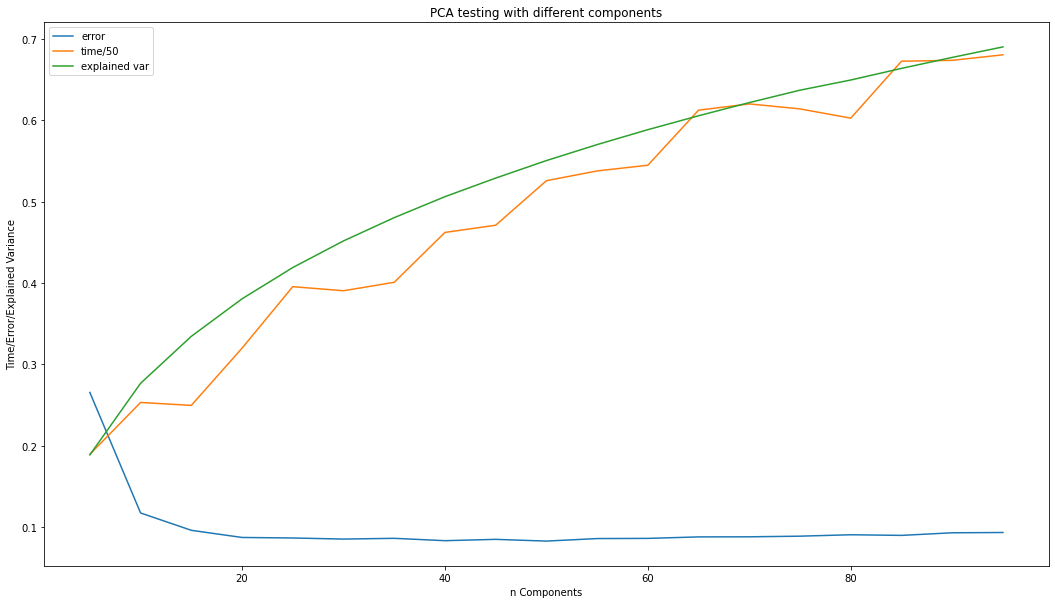

In [59]:

error = numpy.array(error)
exetime = numpy.array(exetime)
plt.figure(figsize=(18,10))
plt.plot(range(5,100,5),error,label="error")
plt.plot(range(5,100,5),exetime,label="time/50")
plt.plot(range(5,100,5),expvar,label="explained var")
plt.legend()

plt.title("PCA testing with different components")
plt.xlabel("n Components")
plt.ylabel("Time/Error/Explained Variance")

***Όπως φαίνεται απο τα αποτελέσματα του grid search και στο γράφημα μετα απο τις 15-20 συνιστώσες βελτιώνεται ελάχιστα η καθόλου το error rate ενώ ο χρόνος εκτέλεσης συνεχίζει να αυξάνεται σταθερά.Θα κρατήσω 20 συνιστώσες και θα ταξινομήσω το test set***

In [60]:
start_time = time.time()
pca = PCA(n_components=20).fit(X_train_scaled)
X_train_trans = pca.transform(X_train_scaled)
X_test_trans = pca.transform(X_test_scaled)
pca_time=time.time()-start_time

 

clf = RandomForestClassifier()
grid = GridSearchCV(clf,cv=5,param_grid=params,verbose=4)
grid.fit(X_train_trans, y_train)
pred = grid.predict(X_test_trans)
end_time = time.time()
    
error_rate_pca = 1-accuracy_score(y_test,pred)
t = end_time-start_time
display(Markdown(
"### Random forests with 20 principal components" + ":\n" +
"**Error rate:** {:.2f}".format(error_rate_pca*100)+"%<br>"+  
"**PCA time** {:.2f}".format(pca_time)+" seconds<br>"+
"**Random forests training time:** {:.2f}".format(t-pca_time)+" seconds<br>"+
"**Error rate increase with 20 components** {:.2f}".format(abs(error_rate_pca*100-error_rate_no_pca*100))+"%<br>"+
"**Random forests with 20 components is faster by** {:.2f}".format(abs((t-pca_time)-no_pca_time))+" seconds"



))

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ...................n_estimators=10;, score=0.919 total time=   1.9s
[CV 2/5] END ...................n_estimators=10;, score=0.912 total time=   1.9s
[CV 3/5] END ...................n_estimators=10;, score=0.911 total time=   1.9s
[CV 4/5] END ...................n_estimators=10;, score=0.906 total time=   1.9s
[CV 5/5] END ...................n_estimators=10;, score=0.915 total time=   1.8s
[CV 1/5] END ....................n_estimators=1;, score=0.799 total time=   0.1s
[CV 2/5] END ....................n_estimators=1;, score=0.784 total time=   0.1s
[CV 3/5] END ....................n_estimators=1;, score=0.783 total time=   0.1s
[CV 4/5] END ....................n_estimators=1;, score=0.777 total time=   0.1s
[CV 5/5] END ....................n_estimators=1;, score=0.796 total time=   0.1s


### Random forests with 20 principal components:
**Error rate:** 8.64%<br>**PCA time** 2.76 seconds<br>**Random forests training time:** 13.53 seconds<br>**Error rate increase with 20 components** 3.66%<br>**Random forests with 20 components is faster by** 9.87 seconds